In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [19]:
from keras.models import Model

In [41]:
class MyModel(keras.models.Model):
    
    def __init__(self):
        super().__init__(self)
        self.dense1 = keras.layers.Dense(units=1, name="DenseAAA")

    def call(self, x):
        x = self.dense1(x)
        return x

In [54]:
model = MyModel()

In [56]:
model.dense1.weights

[]

In [57]:
model.dense1(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.59917855]], dtype=float32)>

In [85]:
x = np.array([[2]])

In [86]:
model(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-3.2383797]], dtype=float32)>

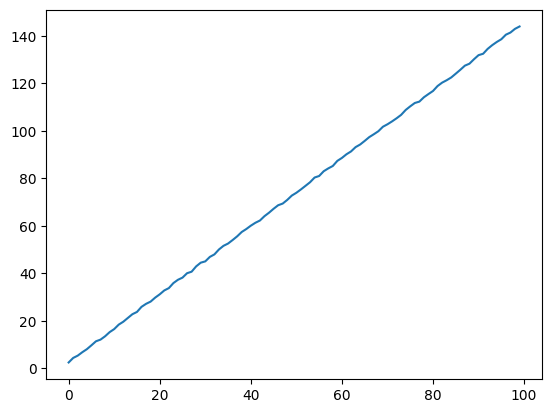

In [47]:
x_data = np.arange(100)
y_data = 1.432 * x_data + 2 + np.random.rand(100)
plt.plot(x_data, y_data)

In [48]:
model.trainable_variables

[<tf.Variable 'DenseAAA/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.6083531]], dtype=float32)>,
 <tf.Variable 'DenseAAA/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [59]:
optimizer = keras.optimizers.Adam()

In [67]:
model.trainable_variables

[<tf.Variable 'DenseAAA/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5950706]], dtype=float32)>,
 <tf.Variable 'DenseAAA/bias:0' shape=(1,) dtype=float32, numpy=array([0.30501968], dtype=float32)>]

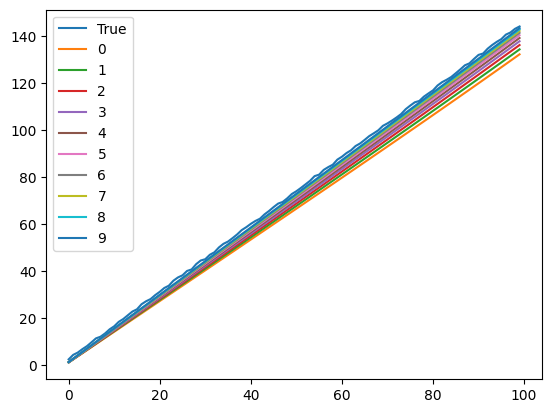

In [78]:
fix, ax = plt.subplots()
ax.plot(x_data, y_data, label='True')
for epoch in range(10):
    y_preds = []
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            # Forward propagation
            pred = model(x.reshape(1,-1))
            
            # Loss function
            loss = (pred - y)**2
        
            # Backprop
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            # print(model.trainable_variables[0].numpy(), model.trainable_variables[1].numpy())

        y_preds.append(pred.numpy()[0][0])
    ax.plot(x_data, y_preds, label=epoch)
ax.legend()
plt.show()

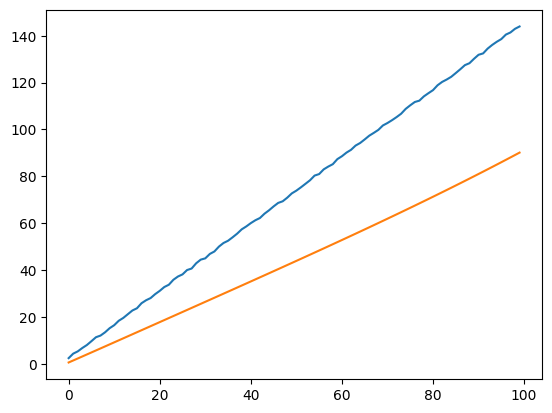

In [76]:
plt.plot(x_data, y_data)
plt.plot(x_data, y_preds)

### <b>Model Summary</b>

In [83]:
model=MyModel()

In [87]:
model.built

True

In [88]:
model.summary()

Model: "my_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DenseAAA (Dense)            multiple                  2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [80]:
x = tf.keras.layers.Input(shape=(1,1))

In [81]:
model__ = keras.Model(inputs=x, outputs=model.call(x))

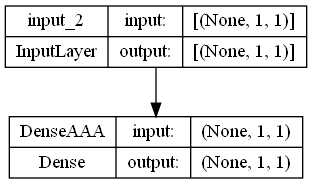

In [82]:
tf.keras.utils.plot_model(model__, show_shapes=True, show_layer_names=True, expand_nested=True)